<a href="https://colab.research.google.com/github/NuraddinQJ/AiDojo-Bootcamp/blob/main/Week3-Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Third Week Project: How many bicycles will be rented during the next month?

## Nuraddin Qassim


This is the third week project and we are going to explore real life data, which is bicycle rental data in Washington DC. The project aims to let you delve into and apply realistic problems from the process of understanding data to modeling and predicting how many bicycles will be rented during the next month

Dataset: https://www.kaggle.com/c/bike-sharing-demand/data



### Install the necessary libraries

In [1]:
# YOUR CODE HERE


### Import the necessary libraries

In [27]:
# YOUR CODE HERE
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

### Reading the data

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!kaggle competitions download -c bike-sharing-demand -p { "/content"}

100% 189k/189k [00:00<00:00, 563kB/s]
100% 189k/189k [00:00<00:00, 562kB/s]


In [8]:
!unzip "/content/bike-sharing-demand.zip"

Archive:  /content/bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [9]:
# YOUR CODE HERE
dataset = pd.read_csv('train.csv')
dataset[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


|index|datetime|season|holiday|workingday|weather|temp|atemp|humidity|windspeed|casual|registered|count|
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|2011-01-01 00:00:00|1|0|0|1|9\.84|14\.395|81|0\.0|3|13|16|
|1|2011-01-01 01:00:00|1|0|0|1|9\.02|13\.635|80|0\.0|8|32|40|
|2|2011-01-01 02:00:00|1|0|0|1|9\.02|13\.635|80|0\.0|5|27|32|
|3|2011-01-01 03:00:00|1|0|0|1|9\.84|14\.395|75|0\.0|3|10|13|
|4|2011-01-01 04:00:00|1|0|0|1|9\.84|14\.395|75|0\.0|0|1|1|

### How many rows are in your dataset?

In [10]:
nrows = dataset.shape[0]
ncols = dataset.shape[1]
print(f'nrows: {nrows} & ncols: {ncols}')

nrows: 10886 & ncols: 12


nrows:  10886  & ncols:  12

### What are the types of data and is there any missing data?

In [11]:
# YOUR CODE HERE
dataset.dtypes, dataset.isnull().sum()

(datetime       object
 season          int64
 holiday         int64
 workingday      int64
 weather         int64
 temp          float64
 atemp         float64
 humidity        int64
 windspeed     float64
 casual          int64
 registered      int64
 count           int64
 dtype: object,
 datetime      0
 season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 casual        0
 registered    0
 count         0
 dtype: int64)

### Convert the datetime columns to datetime type

In [17]:
# YOUR CODE HERE
dataset['datetime'] = pd.to_datetime(dataset['datetime'])
dataset['datetime'][:4]

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
Name: datetime, dtype: datetime64[ns]

### Print the rental totals for the first ten days

<Axes: xlabel='datetime'>

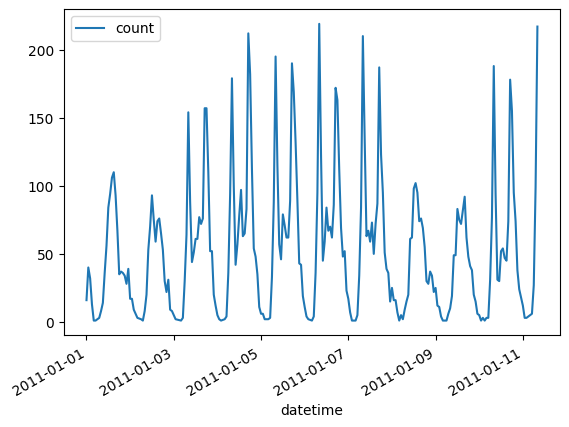

In [18]:
dataset[:24*10].plot(x='datetime', y='count') # 24 hours * 10 days

### Data preprocessing
#### Convert categorical data into numeric data

**Hint**: Use get_dummies()

In [19]:
# YOUR CODE HERE
df = pd.get_dummies(dataset, columns=['season', 'weather'])
df[:5]

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


|index|datetime|season|holiday|workingday|weather|temp|atemp|humidity|windspeed|casual|registered|count|season\_1|season\_2|season\_3|season\_4|weather\_1|weather\_2|weather\_3|weather\_4|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|2011-01-01 00:00:00|1|0|0|1|9\.84|14\.395|81|0\.0|3|13|16|1|0|0|0|1|0|0|0|
|1|2011-01-01 01:00:00|1|0|0|1|9\.02|13\.635|80|0\.0|8|32|40|1|0|0|0|1|0|0|0|
|2|2011-01-01 02:00:00|1|0|0|1|9\.02|13\.635|80|0\.0|5|27|32|1|0|0|0|1|0|0|0|
|3|2011-01-01 03:00:00|1|0|0|1|9\.84|14\.395|75|0\.0|3|10|13|1|0|0|0|1|0|0|0|
|4|2011-01-01 04:00:00|1|0|0|1|9\.84|14\.395|75|0\.0|0|1|1|1|0|0|0|1|0|0|0|

### Drop unnecessary columns

In [23]:
df.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')

In [24]:
# cols_to_drop = ['weather','season', 'casual', 'registered']
# YOUR CODE HERE
df.drop(columns=['casual', 'registered'], inplace=True)
df.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

#### Do the data standardization process on numeric data

In [33]:
# quant_features = ['temp', 'humidity', 'windspeed'] # those are all numerical columns
# YOUR CODE HERE
df[['temp', 'humidity', 'windspeed']] = pd.DataFrame(StandardScaler().fit_transform(df[['temp', 'humidity', 'windspeed']]), columns=['temp', 'humidity', 'windspeed'])
df[['temp', 'humidity', 'windspeed']][:6]


,temp,humidity,windspeed
0,-1.333661,0.993213,-1.567754
1,-1.438907,0.941249,-1.567754
2,-1.438907,0.941249,-1.567754
3,-1.333661,0.681430,-1.567754
4,-1.333661,0.681430,-1.567754
5,-1.333661,0.681430,-0.832442


|index|temp|humidity|windspeed|
|---|---|---|---|
|0|-1\.33359943580326|0\.9931674345025112|-1\.5676816572165309|
|1|-1\.4388411151548441|0\.9412059758972614|-1\.5676816572165309|
|2|-1\.4388411151548441|0\.9412059758972614|-1\.5676816572165309|
|3|-1\.33359943580326|0\.6813986828710121|-1\.5676816572165309|
|4|-1\.33359943580326|0\.6813986828710121|-1\.5676816572165309|
|5|-1\.33359943580326|0\.6813986828710121|-0\.8324042300111806|

#### Extract historical data such as hour, day, month and year

In [35]:
# Hint: data['hour'] = data['datetime'].dt.hour
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
# YOUR CODE HERE

#### Delete the original datetime column after extracting useful information from it

In [37]:
# YOUR CODE HERE
df.drop(columns='datetime', inplace=True)
df[:5]

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,-1.333661,14.395,0.993213,-1.567754,16,1,0,0,0,1,0,0,0,0,1,1,2011
1,0,0,-1.438907,13.635,0.941249,-1.567754,40,1,0,0,0,1,0,0,0,1,1,1,2011
2,0,0,-1.438907,13.635,0.941249,-1.567754,32,1,0,0,0,1,0,0,0,2,1,1,2011
3,0,0,-1.333661,14.395,0.681430,-1.567754,13,1,0,0,0,1,0,0,0,3,1,1,2011
4,0,0,-1.333661,14.395,0.681430,-1.567754,1,1,0,0,0,1,0,0,0,4,1,1,2011


|index|holiday|workingday|temp|atemp|humidity|windspeed|count|season\_1|season\_2|season\_3|season\_4|weather\_1|weather\_2|weather\_3|weather\_4|hour|day|month|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|0|0|-1\.33359943580326|14\.395|0\.9931674345025112|-1\.5676816572165309|16|1|0|0|0|1|0|0|0|0|1|1|
|1|0|0|-1\.4388411151548441|13\.635|0\.9412059758972614|-1\.5676816572165309|40|1|0|0|0|1|0|0|0|1|1|1|
|2|0|0|-1\.4388411151548441|13\.635|0\.9412059758972614|-1\.5676816572165309|32|1|0|0|0|1|0|0|0|2|1|1|
|3|0|0|-1\.33359943580326|14\.395|0\.6813986828710121|-1\.5676816572165309|13|1|0|0|0|1|0|0|0|3|1|1|
|4|0|0|-1\.33359943580326|14\.395|0\.6813986828710121|-1\.5676816572165309|1|1|0|0|0|1|0|0|0|4|1|1|

#### Plot a simple graphs of the average number of rentals per hour and per month

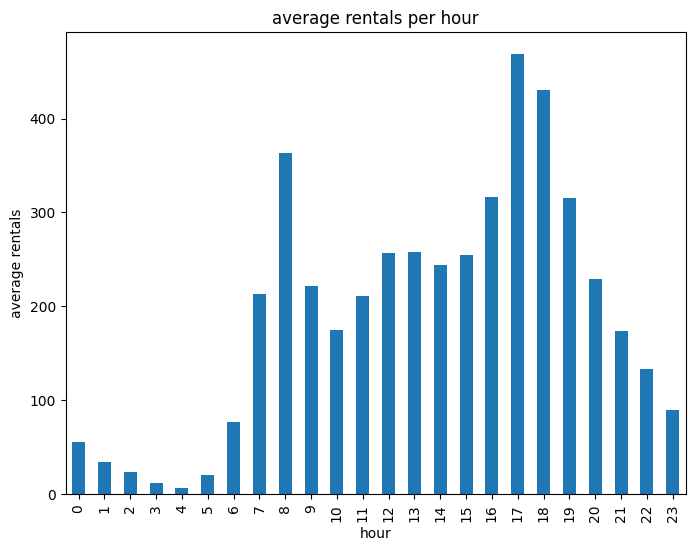

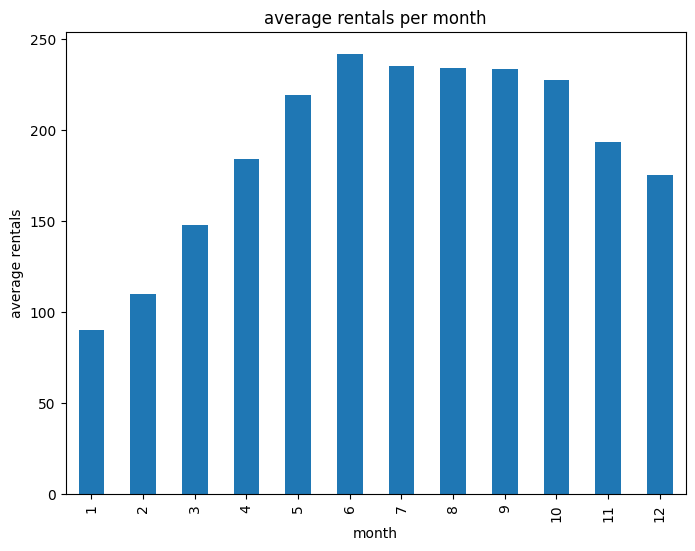

In [61]:
# Hint:

# count_per_hour = data.groupby('hour')['count'].mean()
# count_per_hour.plot(kind='bar')
count_per_hour = df.groupby('hour')['count'].mean()
count_per_month = df.groupby('month')['count'].mean()

plt.figure(figsize=(8, 6))
count_per_hour.plot(kind='bar')
plt.xlabel('hour')
plt.ylabel('average rentals')
plt.title('average rentals per hour')
plt.show()

plt.figure(figsize=(8, 6))
count_per_month.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('average rentals')
plt.title('average rentals per month')
plt.show()

#### Now plot the rental times by month

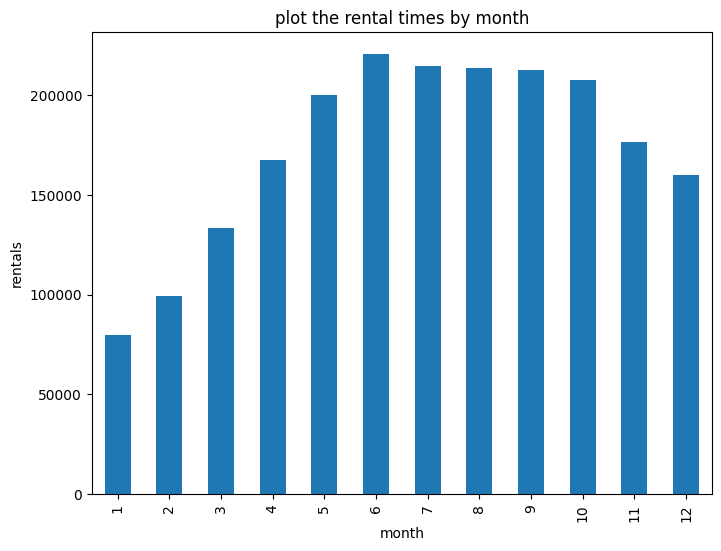

In [65]:
# YOUR CODE HERE
count_per_month = df.groupby('month')['count'].sum()
plt.figure(figsize=(8, 6))
count_per_month.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('rentals')
plt.title('plot the rental times by month')
plt.show()

### Modeling

Model the data with the algorithms you learned in the third week. Extracting the best algorithm that solves this problem, while creating a full report on how the algorithm works and the results it obtained

In [66]:
import seaborn as sns

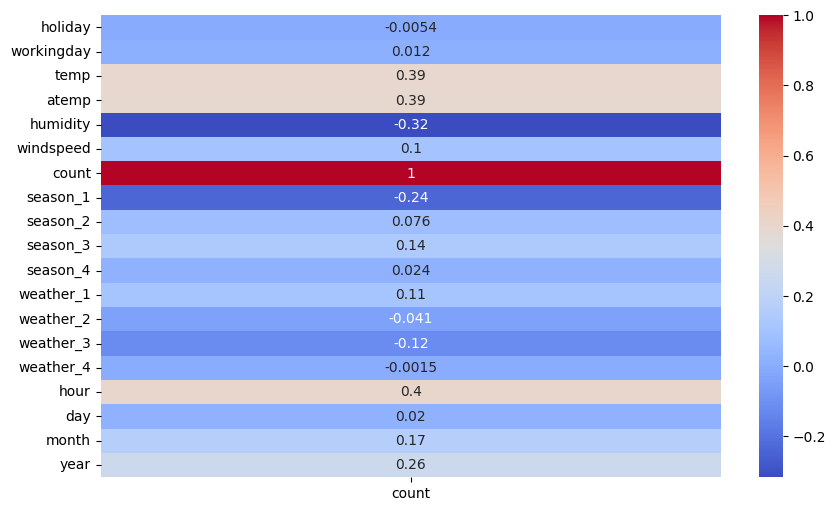

In [105]:
plt.figure(figsize= (10,6))
sns.heatmap(df.corr()[['count']],annot=True, cmap="coolwarm")
plt.show()

In [82]:
# from the correlation heatmap we can see that the most effective features with the target are: 'temp', 'windspeed', 'humidity', 'hour'
features = ['temp', 'windspeed', 'humidity', 'hour']
target = ['count']

In [89]:
df[['hour']] = pd.DataFrame(StandardScaler().fit_transform(df[['hour']]), columns=['hour'])
df[['hour']][:6]

,hour
0,-1.668944
1,-1.524341
2,-1.379739
3,-1.235137
4,-1.090534
5,-0.945932


In [90]:
X= df[features]
y= df[target]

In [92]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

(7620, 4)

In [94]:
X_train.shape, X_test.shape, df.shape

((7620, 4), (3266, 4), (10886, 19))

#### With Linear Regression

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [126]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

#### With Logistic Regression

In [127]:
# YOUR CODE HERE
logistic_reg_model = LogisticRegression(solver='liblinear', C=1.0)
logistic_reg_model.fit(X_train, y_train.values.ravel())
logistic_reg_predictions = logistic_reg_model.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)

#### With K-Nearest Neighbor

In [128]:
# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.values.ravel())
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

#### With Decision Tree

In [129]:
# YOUR CODE HERE
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

#### With Random Forest

In [130]:
# YOUR CODE HERE
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train.values.ravel())
random_forest_predictions = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

#### With XGBOOST

In [131]:
# YOUR CODE HERE
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)

#### You can solve the problem using other algorithms (optional)

In [ ]:
# YOUR CODE HERE

#### Now use evaluation metrics to evaluate the models

In [132]:
# YOUR CODE HERE
print("Linear Regression MSE:", linear_reg_mse)
print("Linear Regression R^2 Score:", linear_reg_r2)
print("Logistic Regression Accuracy:", logistic_reg_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Linear XGBOOST MSE:", xgb_mse)

Linear Regression MSE: 22223.361437382293
Linear Regression R^2 Score: 0.31705101831493243
Logistic Regression Accuracy: 0.019595835884874464
KNN Accuracy: 0.017146356399265157
Decision Tree Accuracy: 0.015003061849357012
Random Forest Accuracy: 0.02020820575627679
Linear XGBOOST MSE: 11702.610615888372


### Do Fine-Tuning to models and choose the best one

In [ ]:
# YOUR CODE HERE

### Write a report about the algorithms you applied and how they work

In [ ]:
# Please write the report clearly
